In [1]:
#IMDB dataset
from tensorflow import keras
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 2s 0us/step


In [40]:
# Decoding back to english
word_index = imdb.get_word_index()
index_word = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = "".join([index_word.get(i-3, "?")+" " for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [46]:
# Multi-hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Vectorize labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [48]:
# Model definition
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compilation
model.compile(optimizer="rmsprop",
            loss="binary_crossentropy",
            metrics=["accuracy"])

In [51]:
# Validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [52]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5375 - accuracy: 0.7799 - val_loss: 0.4056 - val_accuracy: 0.8660
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3331 - accuracy: 0.8895 - val_loss: 0.3453 - val_accuracy: 0.8618
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2476 - accuracy: 0.9167 - val_loss: 0.2982 - val_accuracy: 0.8787
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2013 - accuracy: 0.9322 - val_loss: 0.2726 - val_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1707 - accuracy: 0.9414 - val_loss: 0.2950 - val_accuracy: 0.8805
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1457 - accuracy: 0.9527 - val_loss: 0.2901 - val_accuracy: 0.8840
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1246 - accuracy: 0.9610 - val_loss: 0.2930 - val_accuracy: 0.8870
Epoch 8/20
30

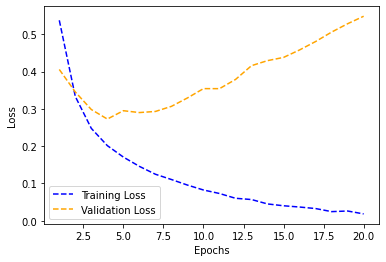

In [60]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "blue", linestyle='dashed', label="Training Loss")
plt.plot(epochs, val_loss_values, "orange", linestyle='dashed', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

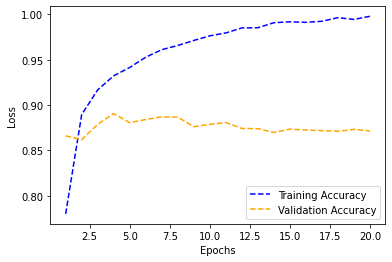

In [61]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "blue", linestyle='dashed', label="Training Accuracy")
plt.plot(epochs, val_acc, "orange", linestyle='dashed', label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [65]:
# Evaluate the model
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.5988 - accuracy: 0.8575


[0.5988333225250244, 0.8575199842453003]